# Assignment Python 3 - Bank Marketing Dataset

## Introduction

Dataset ini terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugal. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, diperlukan lebih dari satu panggilan ke klien yang sama, untuk mengetahui apakah produk (deposito berjangka bank) akan ('ya') atau ('tidak') berlangganan. Data ini berasal dari UCI Machine Learning Repository, lebih tepatnya pada link berikut ini: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Deskripsi

## Import Libraries

In [1]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

#Melakukan import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#import library yang dibutuhkan dalam melakukan model svm
from sklearn.svm import SVC

#melakukan decision tree
from sklearn.tree import DecisionTreeClassifier

#melakukan random forest
from sklearn.ensemble import RandomForestClassifier

#library naive bayes
from sklearn.naive_bayes import GaussianNB

## Preprocessing

### Read Data

In [2]:
# read data
df = pd.read_csv('../Assignment 3/dataset/bank-full.csv', sep=';')

In [3]:
# show top 5 data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Dataset bank full csv mengandung info tentang pemasaran langsung bank dari Portugal. Hal ini untuk bertujuan memprediksi apakah seseorang akan berlangganan (yes) atau tidak berlangganan (no) pada deposito bank

Dataset ini memiliki 17 kolom yaitu:

1. age = usia pelanggan
2. job = jenis perkerjaan pelanggan
3. marital = status pernikahan pelanggan
4. education = tingkat pendidikan pelanggan
5. default = mengetahui status kredit pelanggan, macet atau tidak
6. balance = saldo rata-rata pelanggan (EURO)
7. hosuing = mengetahui pelanggana memiliki pinjaman rumah atau tidak
8. loan = apakah pelanggan memiliki pinjaman pribadi atau tidak
9. contact = cara komunikasi dengan pelanggan (via apa)
10. day = hari dalam bulan terakhir pelanggan dihubungi
11. month = bulan terakhir pelanggan dihubungi
12. duration = durasi panggilan (detik)
13. campaign = jumlah kontak yang dialkukan selama promosi berlangganan pada pelanggan
14. pdays = jumlah hari sejak pelanggan terakhir dihubungi
15. previous = Jumlah kontak yang dilakukan sebelum
16. poutcome = Hasil dari promosi pemasaran sebelumnya
17. y = target pelanggan, yes or no

In [4]:
# showing numeric statistical information
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
# showing categoric statistical information
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [6]:
# showing info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# Show missing value
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Berdasarkan output diatas dapat dipastikan bahwa data ini tidak memiliki missing value.

In [8]:
# Show data dimension
df.shape

(45211, 17)

Berdasarkan output diatas, diketahui bahwa dataset ini berisi 45211 baris dan 17 kolom (fitur)

In [9]:
# Rename columns
df.rename(columns={'y' : 'Class'}, inplace = True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Mengubah kolom y sebagai target, menjadi kolom Class. Hal ini untuk mempermudah pemahaman dalam mengolah dataset

### Data Visualization

Melihat jumlah value Class, disini terlihat bahwa terdapat imbalance class. Hal ini dapat dilihat bahwa value yes lebih sedikit dibandingkan no

In [10]:
print("Subscribed      :", len(df[df['Class']=='yes']))
print("Not Subscribed  :", len(df[df['Class']=='no']))

Subscribed      : 5289
Not Subscribed  : 39922


In [11]:
# group by data untuk melihat jumlah data untuk masing-masing class
df_class = df.groupby(['Class'])[['Class']].count()
df_class

,Class
Class,
no,39922
yes,5289


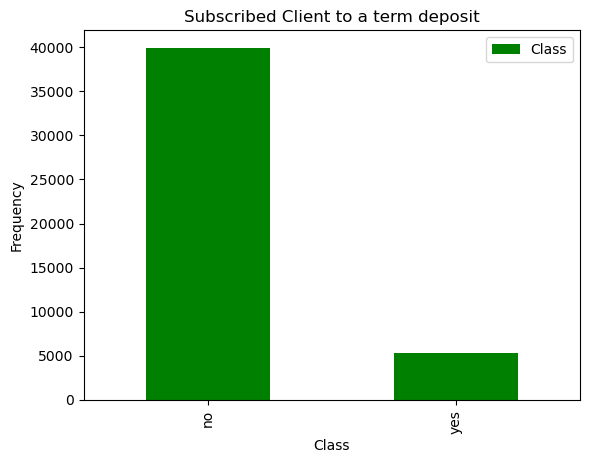

In [12]:
# membangun bar plot untuk kolom y untuk mengecek data imbalanced atau tidak
df_class.plot(kind='bar', color='green')

plt.title('Subscribed Client to a term deposit')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

Di atas merupakan bar plot yang menampilkan frekuensi untuk masing-masing class. Jika dilihat, perbedaan frekuensi antara class yes dan no cukup besar jadi dapat dikatakan data ini bersifat imbalanced.

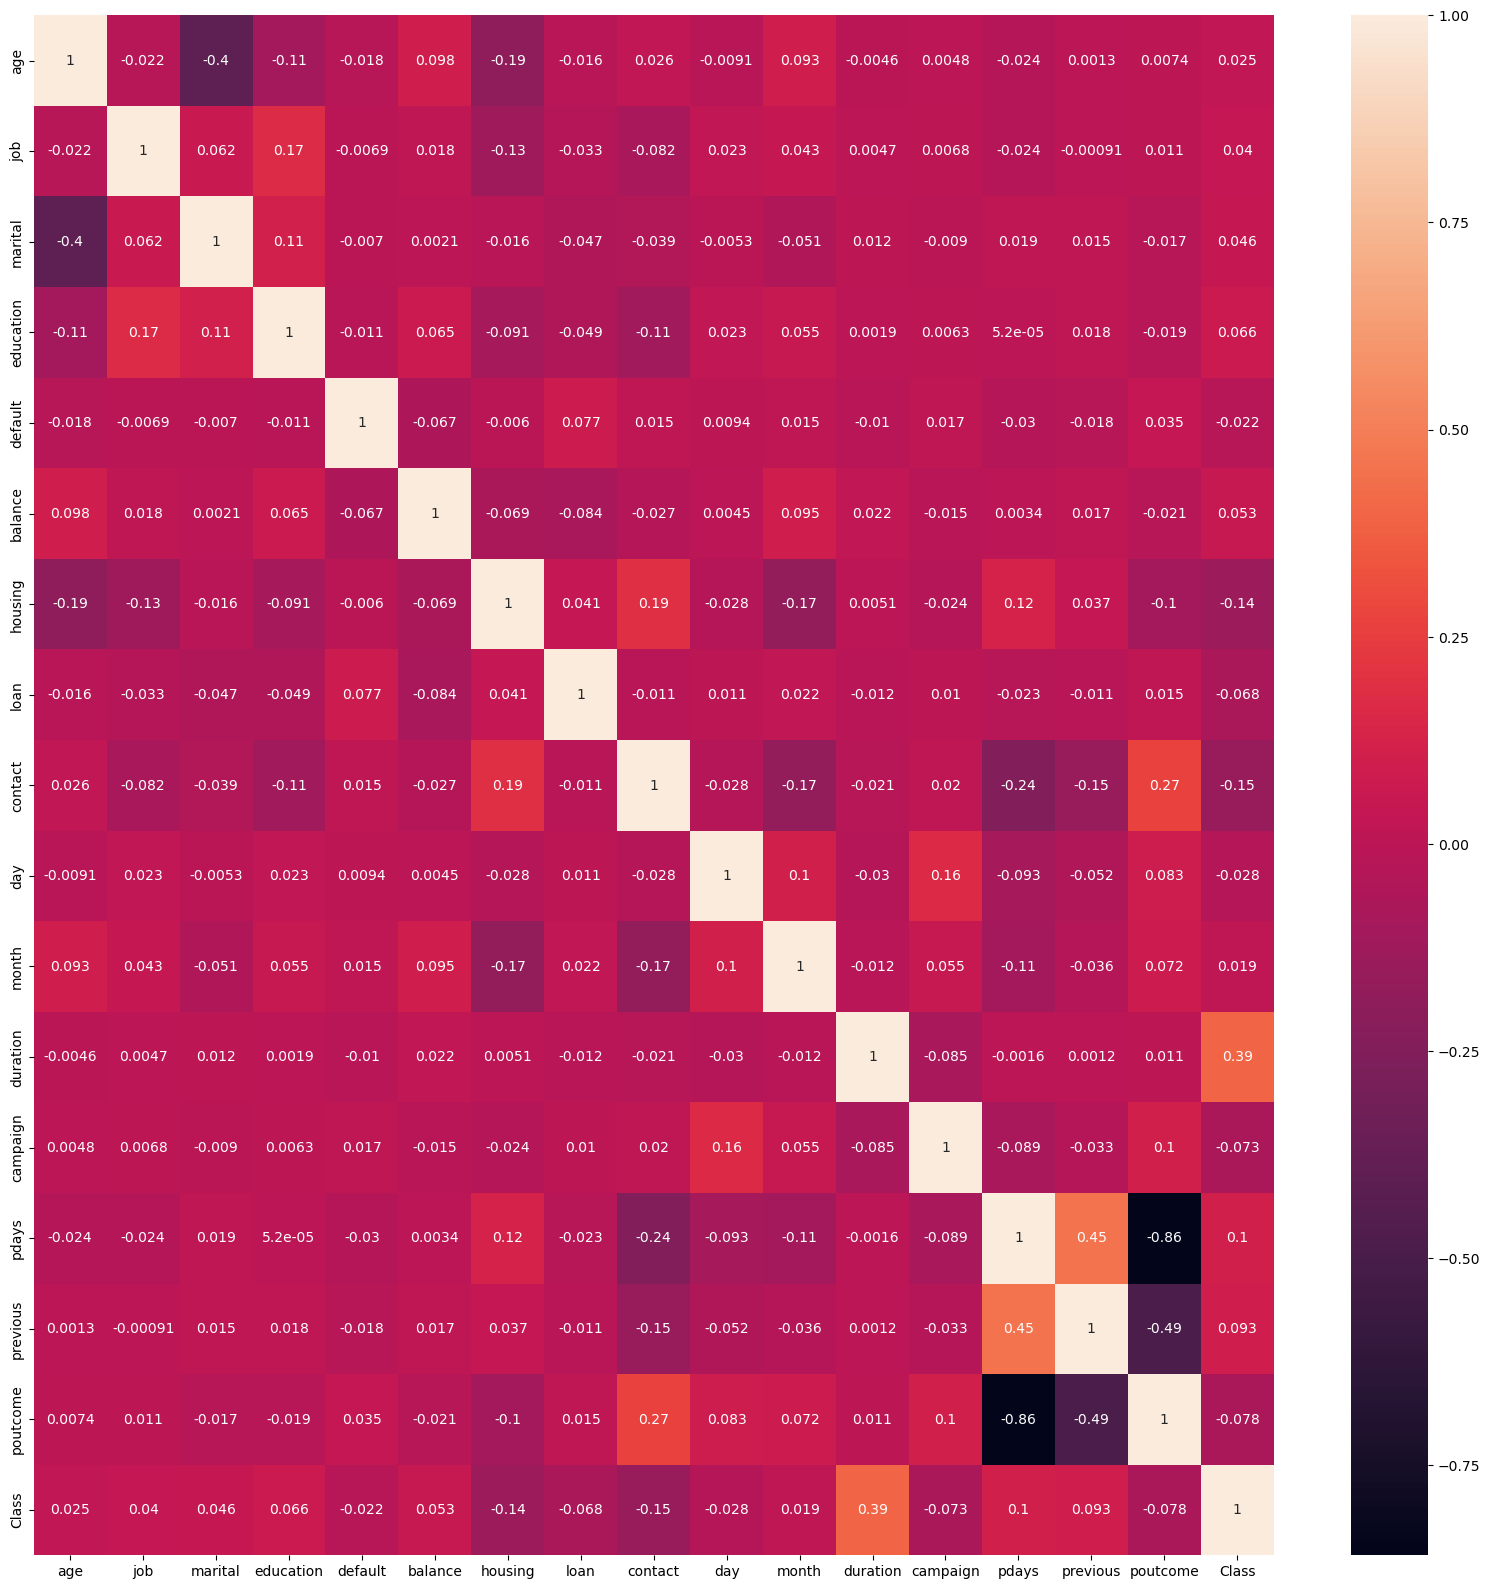

In [22]:
# Show heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

Dari heatmap di atas, dapat diketahui bahwa variabel pdays dan previous memiliki tingkat kolerasi yang tinggi, dengan kata lain kenaikan atau penurunan value dari suatu variabel diikuti oleh perubahan dari value variabel lainnya. Selain itu, terdapat variabel campaign dan day yang memiliki tingkat kolerasi yang lumayan tinggi dibandingkan yang lainnya. Namun, heatmap diatas masih banyak mengandung data categorical.

### Data Preprocessing

In [18]:
df_new = df
df_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Code diatas membuat variabel baru yang berisi dataframe data bank-full yang akan menampung data yang telah dilakukan LabelEncoder(). Label encoding mengacu pada proses transformasi label kata menjadi bentuk numerik

In [19]:
le = LabelEncoder()
df_new['job'] = le.fit_transform(df_new['job'])
df_new['marital'] = le.fit_transform(df_new['marital'])
df_new['education'] = le.fit_transform(df_new['education'])
df_new['default'] = le.fit_transform(df_new['default'])
df_new['housing'] = le.fit_transform(df_new['housing'])
df_new['loan'] = le.fit_transform(df_new['loan'])
df_new['contact'] = le.fit_transform(df_new['contact'])
df_new['poutcome'] = le.fit_transform(df_new['poutcome'])
df_new['Class'] = le.fit_transform(df_new['Class'])

df_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0


Proses transformasi berhasil dilakukan, selanjutnya, mengubah kolom month yang berisi dari bulan januari - desember dengan angka bulan seharusnya

In [20]:
month_map = {
    'jan' : 1,
    'feb' : 2,
    'mar' : 3,
    'apr' : 4,
    'may' : 5,
    'jun' : 6,
    'jul' : 7,
    'aug' : 8,
    'sep' : 9,
    'oct' : 10,
    'nov' : 11,
    'dec' : 12,
}

df_new['month'] = df_new['month'].replace(month_map) 
df_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,5,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,5,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,11,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,11,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,11,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,11,508,4,-1,0,3,0


Dibuat dictionary dengan key nama bulan dan value angka numerik dari bulan tersebut. Selanjutnya menggunakan fungsi replace untuk mengganti nilai dari kolom tersebut </br>

Selanjutnya, dilakukan correlation map kembali, dapat dilihat bahwa masing-masing kolom sekarang sudah lebih baik tampilannya karena telah dilakukan LabelEncode

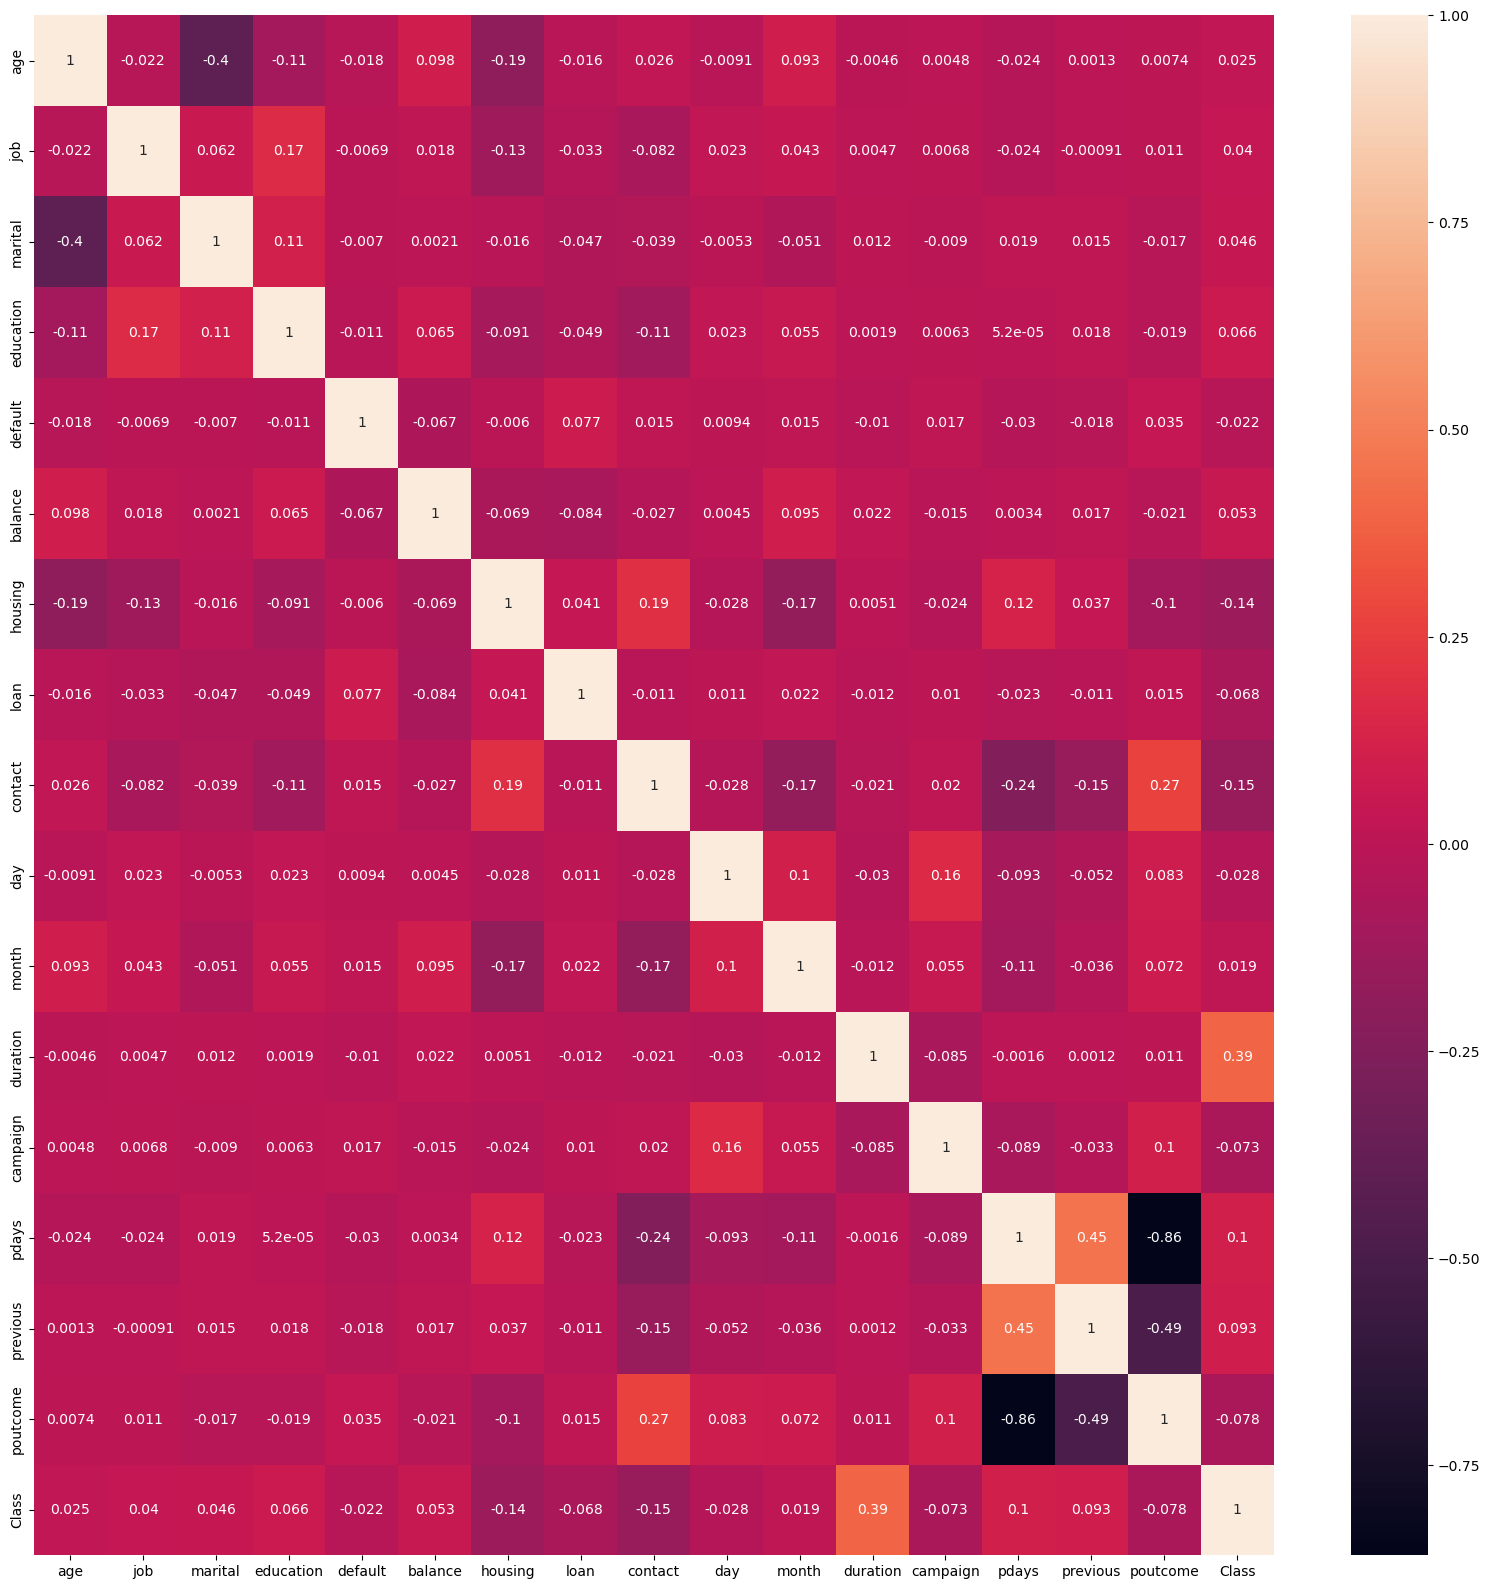

In [21]:
# Show heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

### Modelling

#### Logistic Regression

In [23]:
# extract feature and label
X = df_new[['age', 'balance', 'duration']]
y = df_new['Class']

Dilakukan pemilihan nilai X dan y. nilai X yang dipilih adalah age, balace = saldo rata-rata dan duration = durasi telepon promosi. nilai y yang dipilih adalah Class sebagai target variabel

In [24]:
# Splitting data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

Dilakukan splitting data dengan method train_test_split dengan parameter X dan y yang telah didefisnisikan dan test_size 30% sebagai data testing dan random_state = 2024

In [25]:
# bangun model
model_LR = LogisticRegression(C=0.05, random_state=2024, solver = 'liblinear', multi_class='ovr')

# fit model
model_LR.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=2024,
                   solver='liblinear')

Dilakukan pembuatan model logistic regression dengan fungsi LogisticRegression yang berisi parameter 

* C untuk mengontrol kekuatan regulasi. C = 0.05 merupakan nilai yang cukup kuat untuk menghindari overfitting
* random_state
* solver untuk menentukan algoritma yang digunakan
* multi class digunakan karena dataset ini bersifat multiclass, ovr atau one vest rest untuk mempelahari satu model untuk tiap kelas </br>

Selain itu, juga dilakukan fit model digunakan untuk mempelajari pola dalam data training

In [26]:
# mengecek model overfitting atau tidak serta score dari model
print('Score data training', model_LR.score(x_train, y_train))
print('Score data testing',model_LR.score(x_test, y_test))

Score data training 0.8887414288874143
Score data testing 0.8889748977109366


Dilakukan evaluasi performa model, baik training maupun testing untuk melihat akurasi dari model yang telah dibuat. Masing-masing score tidak berbeda jauh, hanya berbeda 0.001 saja

In [27]:
y_pred = model_LR.predict(x_test)

predict() digunakan untuk membuat data baru dengan parameter X_test lalu dicombine dengan model Logistic yang dtelah dibuat

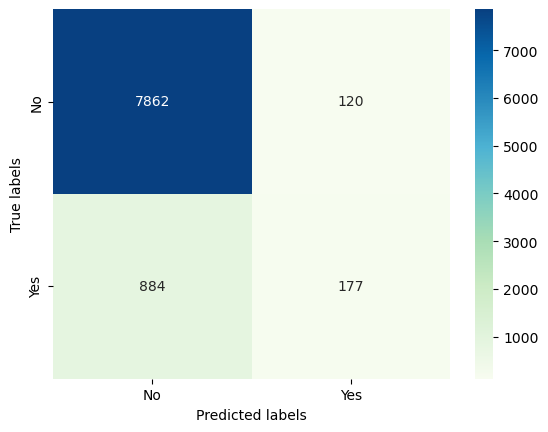

In [28]:
cm_hard = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm_hard, annot=True, fmt='g', cmap="GnBu", ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

Dapat dilihat dari confusion matrix di atas bahwa model yang telah dibangun ini memiliki nilai TP 117, TN 7862, FP 120, dan nilai FN 884. Dapat dilihat masih banyak terjadi kesalahan dalam prediksi data.

##### Selanjutnya, dilakukan pembuatan model baru dengan menambahkan feature pada nilai X

In [29]:
#Melakukan extract fitur
X = df_new[['age','job','education','balance','duration']]
y = df_new['Class']

pada variabel X diberikan feature age=umur, job=pekerjaan, education=tingkat pendidikan, balance=rata-rata saldo, dan duration=durasi telepon promosi. serta nilai y yang menjadi target menyimpan kolom Class

In [30]:
#Malakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =2024)

dilakukan splitting data dengan method train_test_split dengan parameter X dan y yang telah didefisnisikan dan test_size 30% sebagai data testing dan random_state = 2024

In [31]:
#Membangun model Logistic Regressio
model_LR2= LogisticRegression(C=0.05, random_state=2024, solver = 'liblinear', multi_class='ovr')

In [32]:
#fitting model dengan data training
model_LR2.fit(X_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=2024,
                   solver='liblinear')

In [33]:
#evaluasi performa score
print('Training Data Score: ',model_LR2.score(X_train, y_train))
print('Testing Data Score: ',model_LR2.score(X_test, y_test))

Training Data Score:  0.8886782317439251
Testing Data Score:  0.8893394278973754


Dilakukan evaluasi performa model, baik training maupun testing untuk melihat akurasi dari model yang telah dibuat. Masing-masing score tidak berbeda jauh, hanya berbeda 0.001 saja. Namun, pada model ini testing score lebih tinggi dibandingkan training score

In [34]:
y_pred2 = model_LR2.predict(X_test)

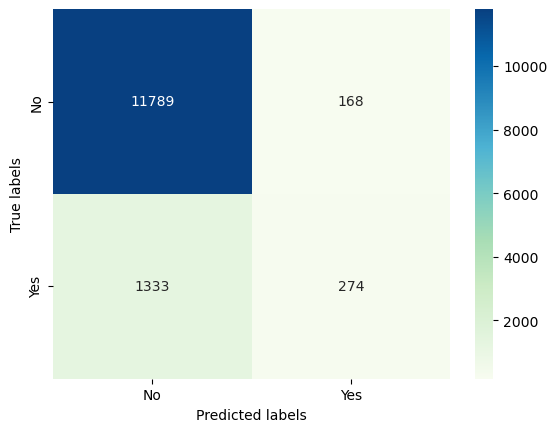

In [35]:
cm_hard = confusion_matrix(y_test, y_pred2)
ax= plt.subplot()
sns.heatmap(cm_hard, annot=True, fmt='g', cmap="GnBu", ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

Dapat dilihat dari confusion matrix di atas bahwa model yang telah dibangun ini memiliki nilai TP 274, TN 11790, FP 167, dan nilai FN 1333. Dapat dilihat masih banyak terjadi kesalahan dalam prediksi data, namun nilai TP lebih meningkat dibandingkan sebelumnya

##### Membuat model baru ke 3 menggunakan seluruh kolom untuk X

In [36]:
X = df_new.drop(columns=['Class'], axis=1)
y = df_new['Class']

X yang dipakai memakai seluruh kolom kecuali kolom Class, karena Class digunakan sebagai target variabel

In [37]:
#Melakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =2024)

In [38]:
#Membangun model Logistic Regression
model_LR3 = LogisticRegression(C=0.05, random_state=2024, solver = 'liblinear', multi_class='ovr')

In [39]:
#fitting model dengan data train
model_LR3.fit(X_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=2024,
                   solver='liblinear')

In [40]:
#Evaluasi performa model
print('Training Data Score: ',model_LR3.score(X_train, y_train))
print('Testing Data Score: ',model_LR3.score(X_test, y_test))

Training Data Score:  0.8906373431920878
Testing Data Score:  0.8905190209377765


In [41]:
y_pred3 = model_LR3.predict(X_test)


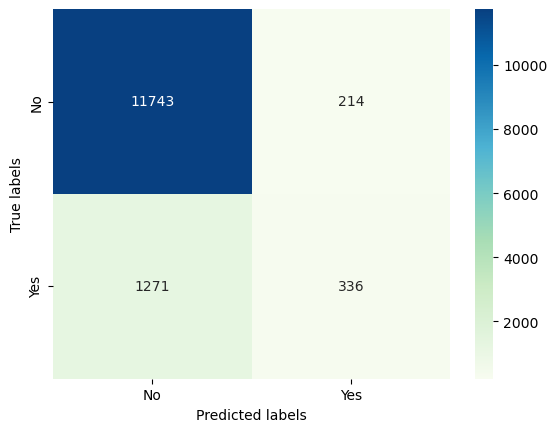

In [42]:
cm_hard = confusion_matrix(y_test, y_pred3)
ax= plt.subplot()
sns.heatmap(cm_hard, annot=True, fmt='g', cmap="GnBu", ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

Jika dilihat dari hasil score performa model, tidak terdapat perubahan yang cukup menonjol. Confusion matrix mengalami perubahan baik pada TP, juga pada TN

Performa model dengan menggunakan semua fitur meningkat lebih baik dari yang awalnya 0.88 meningkat jadi 0.89.

#### K-Nearest Neighbor

In [43]:
#Melakukan extract fitur
X = df_new[['age','job','education','balance','duration']]
y = df_new['Class']

pada variabel X diberikan feature age=umur, job=pekerjaan, education=tingkat pendidikan, balance=rata-rata saldo, dan duration=durasi telepon promosi. serta nilai y yang menjadi target menyimpan kolom Class

In [44]:
#Malakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =2024)

##### Memilih k terbaik untuk n_neighbors KNN

dengan menggunakan cross validation dapat melihat akurasi dari K, sehingga dapat dipilih K mana yang lebih baik bagi data X dan y

In [45]:
# inisialisasi model dengan k=3
knn_3 = KNeighborsClassifier(n_neighbors=3)

# hitung akurasi dengan validasi silang 5-fold
scores_3 = cross_val_score(knn_3, X, y, cv=5, scoring='accuracy')

# hitung rata-rata akurasi dan standar deviasi dari 5-fold cross validation
print(f"K=3, rata-rata akurasi: {scores_3.mean():.3f}, std: {scores_3.std():.3f}")

K=3, rata-rata akurasi: 0.865, std: 0.010


In [46]:
# inisialisasi model dengan k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)

# hitung akurasi dengan validasi silang 5-fold
scores_5 = cross_val_score(knn_5, X, y, cv=5, scoring='accuracy')

# hitung rata-rata akurasi dan standar deviasi dari 5-fold cross validation
print(f"K=5, rata-rata akurasi: {scores_5.mean():.3f}, std: {scores_5.std():.3f}")

K=5, rata-rata akurasi: 0.875, std: 0.012


Digunakan validasi silang 5-fold dengan skor akurasi sebagai metrik evaluasi. cv=5 artinya dataset akan dibagi menjadi 5 bagian (fold) dan model akan dilatih dan diuji 5 kali dengan n_neigbors yang telah ditentukan

hasil akurasi tidak begitu jauh berbeda, namun k=5 lebih baik akurasinya

In [47]:
#Membangun model
knn_model = KNeighborsClassifier(n_neighbors=5)

Dibangun model dengan KNeighborsClassifier dengan n_neighbors =5 seperti yang telah dilihat di atas

In [48]:
#fit model dengan feature yang telah dibuat
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
#Melakukan prediksi data target
y_pred_knn = knn_model.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred_knn))

print('Confusion Matrix KNN Model\n',
     confusion_matrix(y_test, y_pred_knn))

print("\nScore matrics", accuracy_score(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     11957
           1       0.43      0.20      0.27      1607

    accuracy                           0.87     13564
   macro avg       0.67      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564

Confusion Matrix KNN Model
 [[11541   416]
 [ 1291   316]]

Score matrics 0.8741521675022117


Pada classification report dapat dilihat akurasi yang didapatkan adalah 0.87. Model ini juga baik hasil prediksi pada TP, namun masih banyak kesalahan dalam FP, sehingga nilai TN tidak terprediksi dengan baik

#### Support Vector Machine (SVM)

In [51]:
#melakukan read dataset
df1 = pd.read_csv("dataset/bank.csv", sep=';')
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Dilakukan read dataset bank karena ukurannya lebih kecil daripada data sebelumnya. Dikarenakan SVM biasanya lebih baik performa jika menggunakan dataset yang lebih kecil

Dataset bank.csv memiliki 4.521 baris dan 17 kolom

Kemudian, LabelEncoder beberapa kolom tertentu agar dapat diolah datanya

In [52]:
le = LabelEncoder()
df1['job'] = le.fit_transform(df1['job'])
df1['education'] = le.fit_transform(df1['education'])
df1['y'] = le.fit_transform(df1['y'])

df1.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,married,0,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,7,married,1,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,4,single,2,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0


In [53]:
#Melakukan extract fitur
X = df1[['age','job','education','balance','duration']]
y = df1['y']

In [54]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

In [57]:
# bangun model
svc_model = SVC(kernel='linear')

# fitting model
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

In [58]:
#Evaluasi performa model
print('Training Data Score: ',svc_model.score(X_train, y_train))
print('Testing Data Score: ',svc_model.score(X_test, y_test))

Training Data Score:  0.8707332490518331
Testing Data Score:  0.8703021370670597


In [59]:
#Melakukan prediksi data target
y_pred_svm = svc_model.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred_svm))

print("\nScore matrics", accuracy_score(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1196
           1       0.40      0.18      0.25       161

    accuracy                           0.87      1357
   macro avg       0.65      0.57      0.59      1357
weighted avg       0.84      0.87      0.85      1357


Score matrics 0.8703021370670597


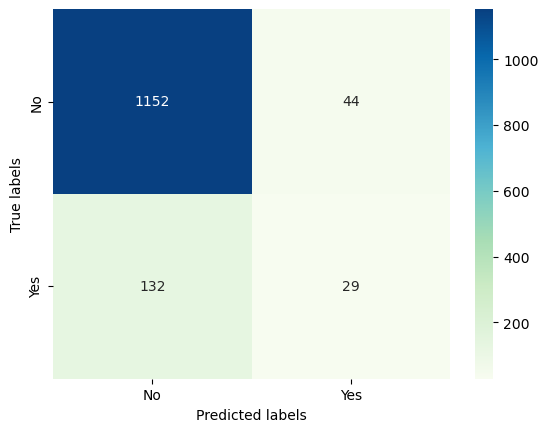

In [61]:
cm_hard = confusion_matrix(y_test, y_pred_svm)
ax= plt.subplot()
sns.heatmap(cm_hard, annot=True, fmt='g', cmap="GnBu", ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

Pada model SVM dengan data testing 30% dapat dilihat bahwa data yang tepat diprediksi dengan benar atau TP adalah 1152, FP berjumlah 44, FN atau data yang sebenarnya positif tapi malah salah diprediksi berjumlah 132, dan data yang terbukti benar salah adalahh 29 data

#### Desicion Tree

In [62]:
#Melakukan extract fitur
X = df_new[['age','job','education','balance','duration']]
y = df_new['Class']

In [63]:
#splitting data 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2024)

In [64]:
#building model
dtc_model = DecisionTreeClassifier()

In [65]:
#fitting model with data training
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
print('Train set score: ', dtc_model.score(X_train, y_train))
print('Test set score : ', dtc_model.score(X_test, y_test))

Train set score:  1.0
Test set score :  0.842229430846358


Didapatkan hasil train score data adalah 1 dan test score nya adalah 0,84. Score di atas menunjukkan angka yang cukup baik, namun tampaknya telah terjadi overfitting data setelah dibandingkan antara kedua score tersebut

In [67]:
y_pred_dt =  dtc_model.predict(X_test)

print('Test set \n\n', classification_report(y_test, y_pred_dt))

Test set 

               precision    recall  f1-score   support

           0       0.91      0.91      0.91     11957
           1       0.34      0.35      0.35      1607

    accuracy                           0.84     13564
   macro avg       0.63      0.63      0.63     13564
weighted avg       0.84      0.84      0.84     13564



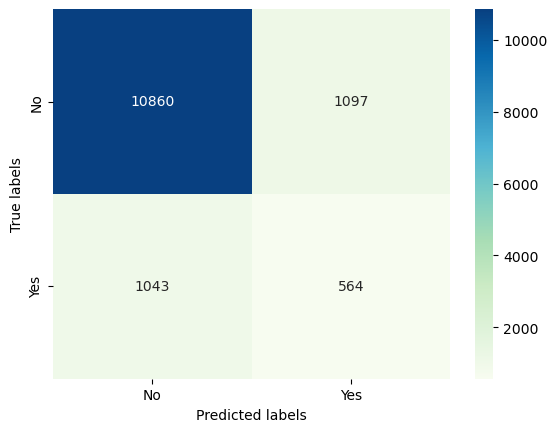

In [68]:
cm_hard = confusion_matrix(y_test, y_pred_dt)
ax= plt.subplot()
sns.heatmap(cm_hard, annot=True, fmt='g', cmap="GnBu", ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

Dapat dilihat dari confusion matrix bisa diketahui bahwa model dapat memprediksi benar 10.851 data yang benar labelnya, dan 567 data yang salah labelnya. serta data yang benar namun dianggap salah berjumlah 1040 dan data yang salah namun dianggap benar berjumlah 1106 data

#### Random Forest

In [69]:
#Melakukan extract fitur
X = df_new[['age','job','education','balance','duration']]
y = df_new['Class']

In [70]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

In [71]:
#building model
rfc_model = RandomForestClassifier(n_estimators=100)

#fitting model
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

Code di atas berguna untuk membangun model dengan memanggil RandomForestClassifier dengan n_estimators atau jumlah pohon keputusan yang akan dibangun dalam model. Pohon keputusan ini dibangun secara acak dengan memilih sampel acak dari dataset dan fitur acak untuk setiap pohon yang dibangun.

In [72]:
print('Train set score: ', rfc_model.score(X_train, y_train))
print('Test set score : ', rfc_model.score(X_test, y_test))

Train set score:  0.9999368028565109
Test set score :  0.8853583013860218


Dapat dilihat hasil scoring antara data training dan data testing di atas sedikit overfitting karena salah satu skor mendapatkan nilai akurasi score 0.99

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11957
           1       0.53      0.26      0.35      1607

    accuracy                           0.89     13564
   macro avg       0.72      0.61      0.64     13564
weighted avg       0.86      0.89      0.87     13564



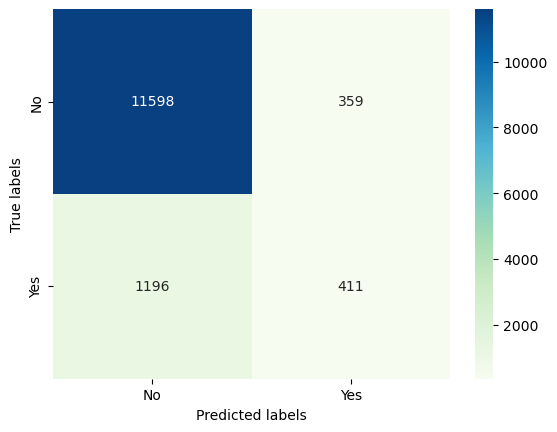

In [73]:
#predict data
y_pred_rfc =  rfc_model.predict(X_test)

print(classification_report(y_test, y_pred_rfc))

# menampilkan confusion matrix
cm_hard = confusion_matrix(y_test, y_pred_rfc)
ax= plt.subplot()
sns.heatmap(cm_hard, annot=True, fmt='g', cmap="GnBu", ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

Kemudian dilakukan predikasi data dari data X_test, dapat diketahui bahwa akurasi yang didapatkan adalah 0.88 dengan TP 11.591, TN 418, FP 366, dan FN 1189

#### Naive Bayes

In [74]:
#building model
NB_model = GaussianNB()

In [75]:
#fitting model
NB_model.fit(X_train, y_train)

GaussianNB()

In [76]:
print('Train set score: ', NB_model.score(X_train, y_train))
print('Test set score : ', NB_model.score(X_test, y_test))

Train set score:  0.8812525673839543
Test set score :  0.8794603361840165


Melihat akurasi score dari data training dan testing dari model Naive Bayes yang telah dibangun. dapat dilihat akurasi yang dihasilkan cukup baik dan tidak terjadi overfitting

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     11957
           1       0.48      0.28      0.35      1607

    accuracy                           0.88     13564
   macro avg       0.70      0.62      0.64     13564
weighted avg       0.86      0.88      0.86     13564



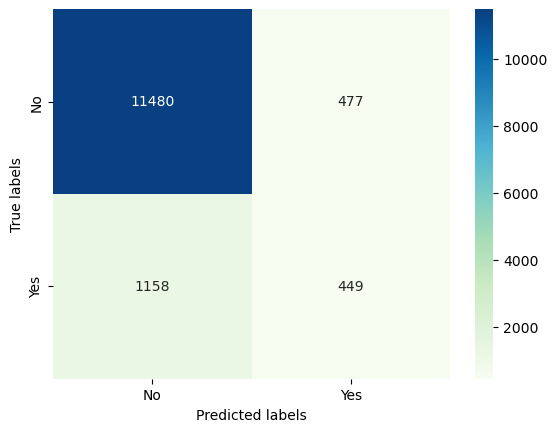

In [77]:
#predict data
y_pred_nb =  NB_model.predict(X_test)

print(classification_report(y_test, y_pred_nb))

# menampilkan confusion matrix
cm_hard = confusion_matrix(y_test, y_pred_nb)
ax= plt.subplot()
sns.heatmap(cm_hard, annot=True, fmt='g', cmap="GnBu", ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

Dapat dilihat akurasi test set adalah 0.88 dengan TP 11480, TN 449, FP 477, dan FN 1158.

### Kesimpulan

In [78]:
print('Accuracy Score:\n')
print('Logistic Regression :', accuracy_score(y_test, y_pred3))
print('Decision Tree       :', accuracy_score(y_test, y_pred_dt))
print('Random Forest       :', accuracy_score(y_test, y_pred_rfc))
print('Naive Bayes         :', accuracy_score(y_test, y_pred_nb))
print('KNN                 :', accuracy_score(y_test, y_pred_knn))

Accuracy Score:

Logistic Regression : 0.8905190209377765
Decision Tree       : 0.842229430846358
Random Forest       : 0.8853583013860218
Naive Bayes         : 0.8794603361840165
KNN                 : 0.8741521675022117


SVM : 0.8704021370670597

SVM tidak bisa ditampilkan bersamaan karena menggunakan data yang berbeda.

Dari akurasi skor di atas dapat diambil kesimpulan bahwa model-model yang telah dibuat di atas menghasilkan akurasi yang cukup baik. Namun, di antara ke 6 model tersebut, Logistic Regression memiliki akurasi yang lebih baik.

Hal ini juga dipengaruhi confusion matrix yang dimiliki oleh Logistic Regression yang cukup baik. Selain itu, algoritma ini lebih cepat dibandingkan SVM model